### Rise

In [6]:
from model import *
import matplotlib.pyplot as plt

/home/brage/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 803: system has unsupported display driver / cuda driver combination (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [50]:
model = SimpleModel()
path = "/home/brage/Desktop/paper-zoo/cv/rise/lightning_logs/version_6/checkpoints/epoch=22-step=43125.ckpt"
model.load_from_checkpoint(path)

SimpleModel(
  (model): Net(
    (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=256, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=128, bias=True)
    (fc3): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [9]:
from mnist import train_ds

In [18]:
X, y = train_ds[0]

In [11]:
#import importlib
#importlib.reload(mask)
from mask import *
%load_ext autoreload
%autoreload 2

In [51]:
%matplotlib inline
mask = binary_masks(10, 28, 28, p=.3, divide_size=4)
y_pred = model(X.reshape((1, ) + X.shape))
model_x = torch.argmax(y_pred).item()
f, axarr = plt.subplots(1, 3)#, figsize=(100,100))
axarr[0].imshow(X[0], cmap='gray')
axarr[0].set_title(f"truth {str(y)}, model {model_x}")
axarr[1].imshow(mask[0][0] * 255)
axarr[2].imshow(mask[0][0] * X[0], cmap='gray')

ValueError: Image size of 160338x211 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 3 Axes>

In [28]:
class_id = 5

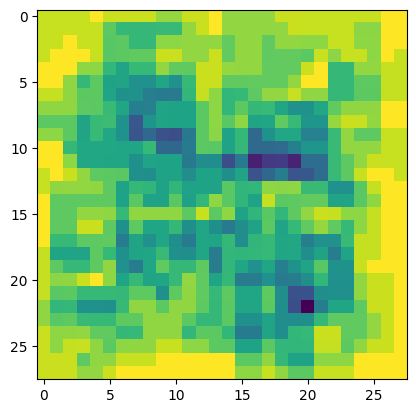

In [27]:
img_mask_score = mask_score(model, X[0], class_id=class_id)
plt.imshow(img_mask_score.detach().numpy())

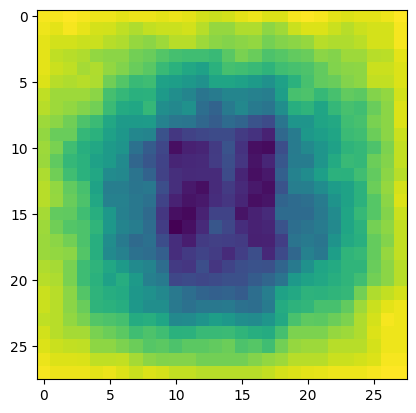

In [29]:
img_mask_score = mask_score(model, X[0], class_id=class_id, divide_size=3)
plt.imshow(img_mask_score.detach().numpy())

### Metrics

In [349]:
## TODO: This looks very wrong

In [47]:
F.softmax(model(X[0].reshape((1, 1, 28, 28))), dim=1)

tensor([[0.0991, 0.1011, 0.0994, 0.1014, 0.0995, 0.1021, 0.1013, 0.0956, 0.0983,
         0.1023]], grad_fn=<SoftmaxBackward0>)

In [30]:
from metrics import deletion

In [48]:
x, y = deletion(
    f=lambda x: F.softmax(model(x.reshape((1, 1) + x.shape)), dim=1)[0][class_id].detach().numpy(),
    image=X[0],
    s=img_mask_score,
    N=1
)

In [49]:
y

[array(0.10177977, dtype=float32),
 0.10153980553150177,
 0.10205166786909103,
 0.10203951597213745,
 0.10182464122772217,
 0.1018964946269989,
 0.10158859193325043,
 0.10210558772087097,
 0.10177555680274963,
 0.10148308426141739,
 0.10247693955898285,
 0.10205911099910736,
 0.10178042203187943,
 0.10188999027013779,
 0.10171981155872345,
 0.10175421833992004,
 0.10195739567279816,
 0.10194551199674606,
 0.10223092883825302,
 0.10200503468513489,
 0.10169054567813873,
 0.1019587591290474,
 0.10204623639583588,
 0.10175479203462601,
 0.10156776010990143,
 0.10183502733707428,
 0.1016508936882019,
 0.10181544721126556,
 0.10177034884691238,
 0.10186271369457245,
 0.10227560997009277,
 0.10207920521497726,
 0.1020069420337677,
 0.10206569731235504,
 0.10197895765304565,
 0.10197091102600098,
 0.10179971903562546,
 0.10184869915246964,
 0.10173288732767105,
 0.10188690572977066,
 0.10188059508800507,
 0.10237184911966324,
 0.10210268944501877,
 0.10175338387489319,
 0.1017034724354744,
 0